In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



In [3]:
df = pd.read_csv('/content/LoanDataset---LoansDatasest.csv')
df.head()

customer_id  customer_age customer_income home_ownership  \
0          1.0            22           59000           RENT   
1          2.0            21            9600            OWN   
2          3.0            25            9600       MORTGAGE   
3          4.0            23           65500           RENT   
4          5.0            24           54400           RENT   

   employment_duration loan_intent loan_grade   loan_amnt  loan_int_rate  \
0                123.0    PERSONAL          C  £35,000.00          16.02   
1                  5.0   EDUCATION          A   £1,000.00          11.14   
2                  1.0     MEDICAL          B   £5,500.00          12.87   
3                  4.0     MEDICAL          B  £35,000.00          15.23   
4                  8.0     MEDICAL          B  £35,000.00          14.27   

   term_years historical_default  cred_hist_length Current_loan_status  
0          10                  Y                 3             DEFAULT  
1           1                NaN                 2          NO DEFAULT  
2           5                  N                 3             DEFAULT  
3          10                  N                 2             DEFAULT  
4          10                  Y                 4             DEFAULT

In [9]:
# Fill missing values in numerical columns with their mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values in categorical columns with their mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [10]:
# Remove commas and convert strings to numbers
columns_to_clean = ['customer_income', 'loan_amnt']
for col in columns_to_clean:
    df[col] = df[col].replace({',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [11]:
# Refill any NaNs caused by invalid number conversion
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


In [12]:
# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
df['historical_default'] = label_encoder.fit_transform(df['historical_default'])
df['Current_loan_status'] = label_encoder.fit_transform(df['Current_loan_status'])


In [13]:
X = df.drop(['customer_id', 'Current_loan_status'], axis=1)
y = df['Current_loan_status']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['loan_amnt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['loan_amnt']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [15]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

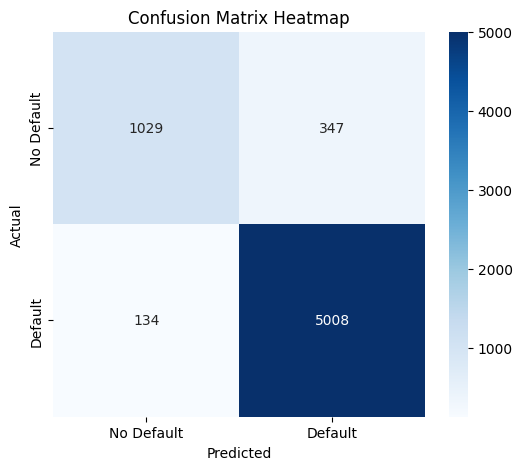

Accuracy:  92.620436%


In [16]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
print(f'Accuracy: {accuracy* 100: 4f}%')